# Laboratorio 3

Integrantes:

*Jessica Robles*

*Maria Paula Gonzalez*

*Juan Esteban Vergara*

## 1. Importar librerias

In [3]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

## 2. Manejo de los datos

### Carga de datos

In [4]:
# Se cargan los datos. 
df_original = pd.read_csv('202220_Laboratorio_3_data_university_admission_train.csv', index_col=0)
df_info = df_original.copy()
print(df_info.shape)
df_info.head(5)

(1569, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,479,327,113,4,4.00,2.77,8.88,1,84.47
1,446,301,92,1,1.85,1.50,7.71,0,45.08
2,336,297,100,1,2.41,1.59,7.89,0,47.42
3,20,303,98,3,3.50,3.00,8.50,0,62.00
4,432,320,94,2,1.38,3.50,8.78,1,73.00


### Informacion de los datos

In [5]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         1569 non-null   int64  
 1   GRE Score          1569 non-null   int64  
 2   TOEFL Score        1569 non-null   int64  
 3   University Rating  1569 non-null   int64  
 4   SOP                1569 non-null   float64
 5   LOR                1569 non-null   float64
 6   CGPA               1569 non-null   float64
 7   Research           1569 non-null   int64  
 8   Admission Points   1504 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 122.6 KB


Podemos observar que hay nulos en la columna Admission Points.

In [6]:
df_info.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1504.000000
mean,239.022945,307.669216,101.632250,2.873805,2.980848,3.013907,8.342231,0.469726,66.744328
std,149.802641,17.857559,12.386238,1.245147,1.234802,1.214377,0.812729,0.499242,19.253029
min,1.000000,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,94.000000,298.000000,96.000000,2.000000,2.000000,2.050000,7.750000,0.000000,48.000000
50%,236.000000,309.000000,104.000000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,377.000000,322.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000,84.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,145.500000


### Limpieza de datos

In [7]:
df_info_clean = df_info.copy()

Se quitan los datos nulos de la variable objetivo ya que no son muchos y dejarlos afectarian al modelo de regresion

In [8]:
df_info_clean = df_info_clean.dropna(axis=0, subset=["Admission Points"])

Se elimina la columna "Serial No." porque es un valor unico que representa el id de un estudiante, por lo tanto, no esta relacionado a el puntaje de admision.

In [9]:
df_info_clean = df_info_clean.drop(["Serial No."], axis=1)

### Quitar datos atipicos

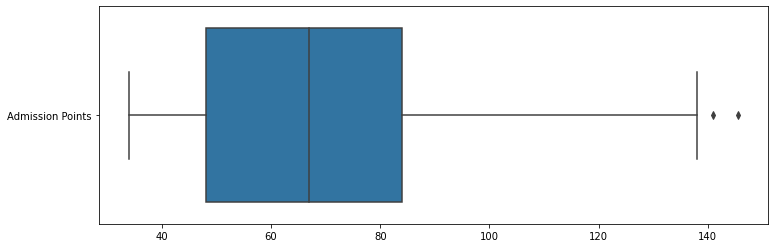

In [10]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_info_clean[['Admission Points']], orient="h")

In [11]:
df_info_clean = df_info_clean[df_info_clean['Admission Points']<140]

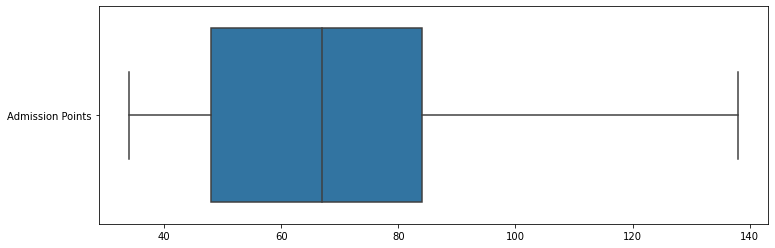

In [12]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_info_clean[['Admission Points']], orient="h")

### Visualizacion de los datos ya limpios

In [13]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1568
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          1502 non-null   int64  
 1   TOEFL Score        1502 non-null   int64  
 2   University Rating  1502 non-null   int64  
 3   SOP                1502 non-null   float64
 4   LOR                1502 non-null   float64
 5   CGPA               1502 non-null   float64
 6   Research           1502 non-null   int64  
 7   Admission Points   1502 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 105.6 KB


In [14]:
df_info_clean.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,307.683755,101.566578,2.872170,2.976019,3.018016,8.344953,0.468708,66.642457
std,17.828459,12.450752,1.238258,1.232877,1.211137,0.809881,0.499186,19.061924
min,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,298.000000,96.000000,2.000000,2.000000,2.050000,7.760000,0.000000,48.000000
50%,309.000000,103.000000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,322.000000,111.000000,4.000000,4.000000,4.000000,9.047500,1.000000,84.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,138.000000


### Normalizar

In [15]:
mms = MinMaxScaler()

df_info_norm= mms.fit_transform(df_info_clean.copy())
saved_cols = df_info_clean.columns
df_info_clean = pd.DataFrame(df_info_norm, columns =saved_cols)

## 3. Correlacion de los datos

### Diagramas de dispersion

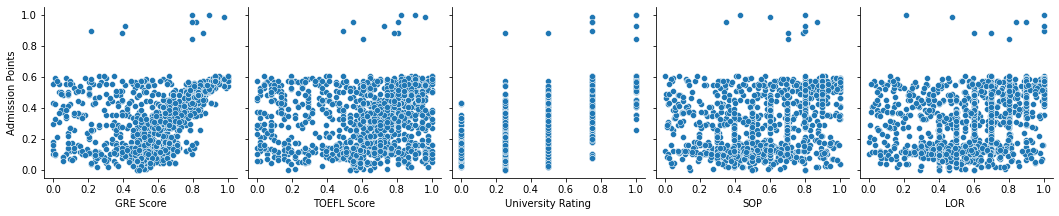

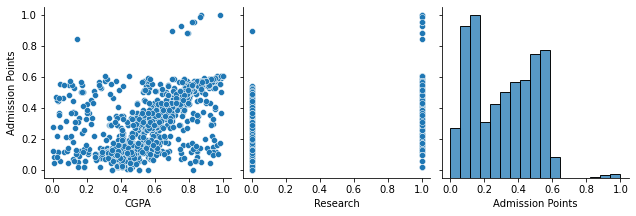

In [16]:
sns.pairplot(df_info_clean, height=3, y_vars = 'Admission Points', x_vars = df_info_clean.columns[0:5], kind='scatter')
sns.pairplot(df_info_clean, height=3, y_vars = 'Admission Points', x_vars = df_info_clean.columns[5:10], kind='scatter')
#sns.pairplot(df_info_clean, height=3, y_vars = 'Admission Points', x_vars = df_info_clean.columns[10:], kind='scatter')

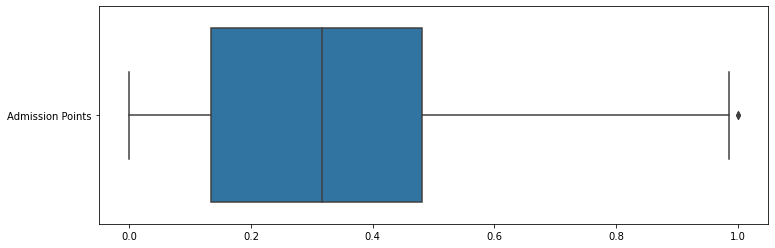

In [17]:
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_info_clean[['Admission Points']], orient="h")

In [18]:
df_info_clean = df_info_clean[df_info_clean['Admission Points']<1.0]

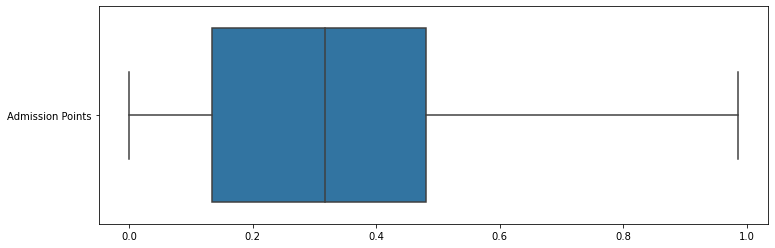

In [19]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_info_clean[['Admission Points']], orient="h")

### Matriz de correlaciones

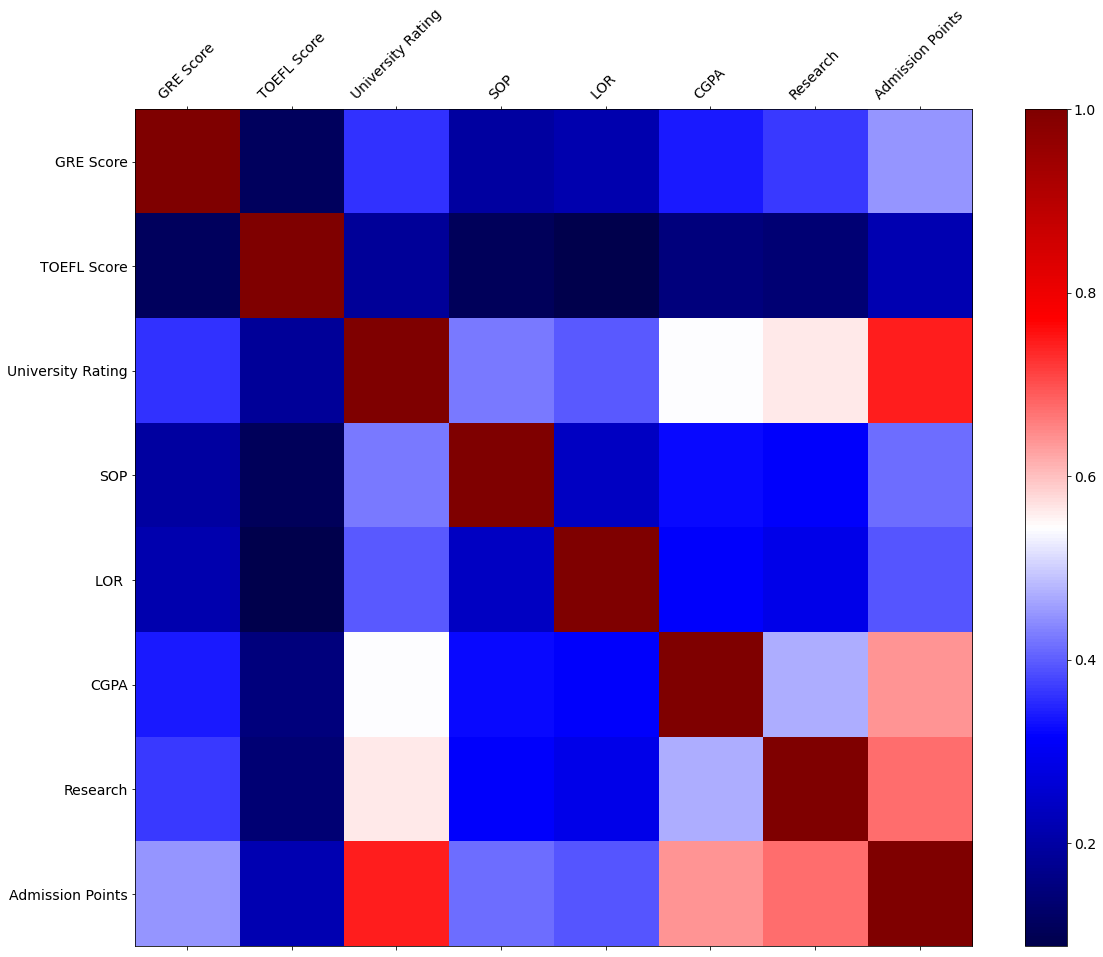

In [20]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_info_clean.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_info_clean.select_dtypes(['number']).shape[1]), df_info_clean.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_info_clean.select_dtypes(['number']).shape[1]), df_info_clean.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

Se encontró que hay una alta correlacion entre University rating y la variable objetivo, que en este caso es 'Admission Points'. Esto nos esta indicando que la variable University Rating es la que más impacta en el puntaje de admision.

Al ejecutar ambas maneras de encontrar la correlacion entre los datos nos dimos cuenta que la matriz de correlaciones es la que da la informacion de manera más precisa, ya que esta encuentra un numero que representa la relacion entre todas las variables que se encuentran en los datos suministrados.

## 4. Modelo de regresion

In [21]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['University Rating', 'Research', 'CGPA']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

In [22]:
# Modelo
model = [('model', LinearRegression())]

In [23]:
# Decalra el pipeline
pipeline = Pipeline(pre+model)

In [24]:
# Extraemos las variables explicativas y objetivo para entrenar
X = df_info_clean.drop('Admission Points', axis = 1)
y = df_info_clean['Admission Points']

pipeline = pipeline.fit(X,y)

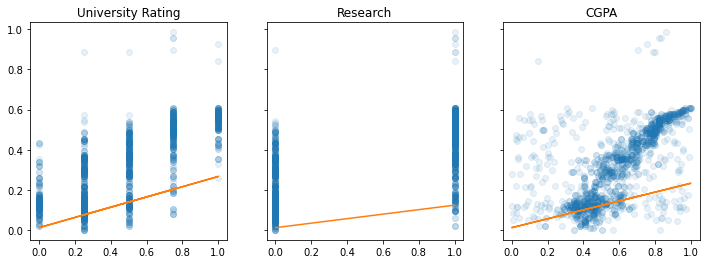

In [25]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

## 5. Exportar modelo

In [26]:
# Usamos la lbreria joblib
filename = 'modelo.joblib'
# Se guarda
dump(pipeline, filename) 

['modelo.joblib']

In [27]:
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['University Rating',
                                                   'Research', 'CGPA'])])),
                ('model', LinearRegression())])

In [28]:
print(df_info_clean.shape)
df_info_clean.head(5)

(1500, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,0.843373,0.862745,0.75,0.799197,0.554,0.727749,1.0,0.485288
1,0.530120,0.450980,0.00,0.367470,0.300,0.421466,0.0,0.106538
2,0.481928,0.607843,0.00,0.479920,0.318,0.468586,0.0,0.129038
3,0.554217,0.568627,0.50,0.698795,0.600,0.628272,0.0,0.269231
4,0.759036,0.490196,0.25,0.273092,0.700,0.701571,1.0,0.375000


In [29]:
# Clasificamos los datos recientes
# Eliminamos los registros que tienen la variable objetivo nula
df_info_clean = df_info_clean.dropna()
df_info_clean['Admission Points'] = p2.predict(df_info_clean)

<AxesSubplot:xlabel='Admission Points', ylabel='Count'>

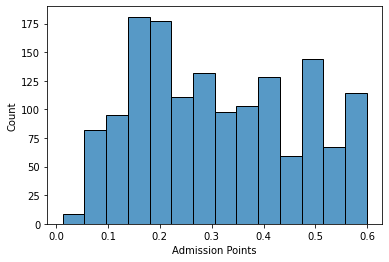

In [30]:
sns.histplot(df_info_clean['Admission Points'])

In [31]:
pipeline['model'].coef_

array([0.25501923, 0.11217   , 0.22138814])

In [32]:
# En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,University Rating,0.255019
1,Research,0.112170
2,CGPA,0.221388


## 6. Metricas

### 6.1 Coeficiente de determinación $R^2$

La primera métrica que tenemos es el coeficiente de determinación ($R^2$). Este valor indica que porcentaje de la varianza en la variable objetivo se puede explicar con las variables observadas. Este se define como:
$$ R^2 =  1 - \frac{\sum_{i=1}^{n} (y_i - f_i)^2}{\sum_{i=1}^{n} (y_i - \hat{y})^2}$$

donde $y_i$ es el elemento $i$ de la varaible objetivo, $f_i$ el elemento i de los valores predecidos y:

$$ \hat{y} = \frac{1}{n} \sum_{i=1}^{n} y_{i} $$

In [33]:
p2.score(X,y)
##Coeficiente de determinación

0.6960844675891699

Interpretación del valor

### 6.2 Root-Mean-Square Error (RMSE) 

La segunda medida es la raiz del error cuadrático medio, definido como:

$$ RSME = \sqrt{\frac{\sum_{i=1}^{n} (y_i - f_i)^2}{n}} $$

In [34]:
y_true = y
y_predicted = p2.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))

0.10012813099313621

Interpretación de los datos

## 7. Supuestos de la regresión lineal

### Colinealidad

Es necesario que las columnas utilizadas no tengan (o tengan muy poca) colinealidad. La forma mas sencilla de hacer esto es con la matriz de correlación

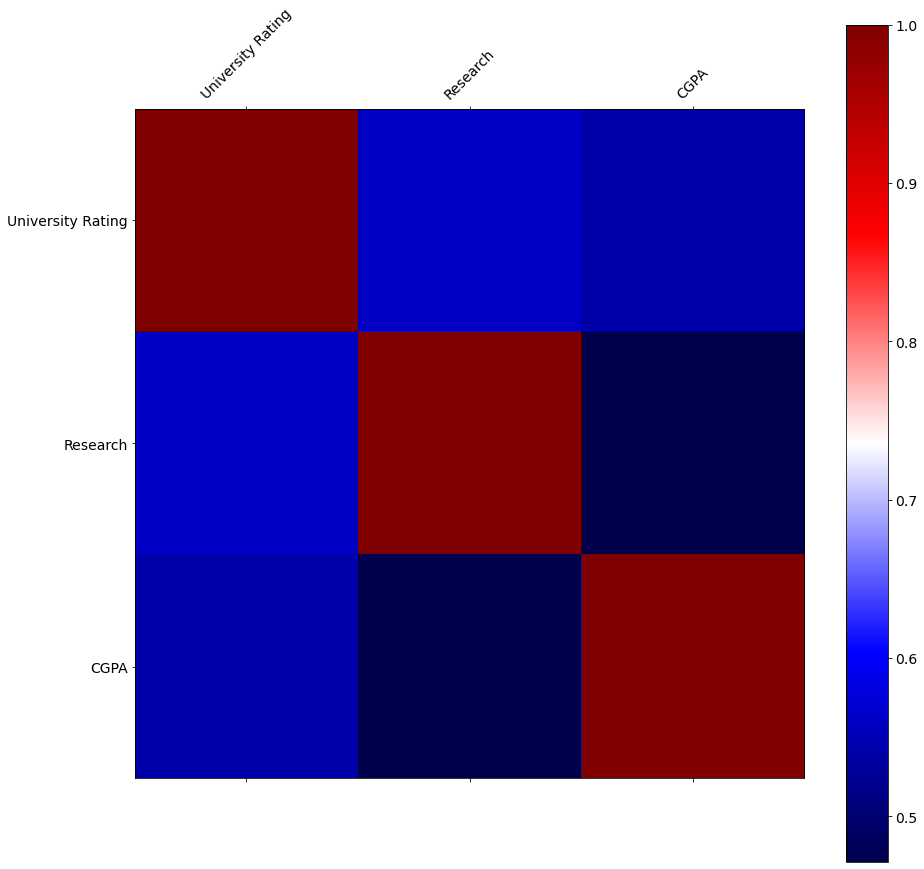

In [35]:
df_temp = df_info_clean[selected_cols]


f = plt.figure(figsize=(15, 15))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

Vemos que CGPA y research tienen alta colinealidad entre si. Si las columnas usadas tienen alta combinación lineal, la influencia de cada uno sobre la regresión no puede distinguirse al quedar solapados unos sobre otros. Los pronosticos se vuelven poco fiables ya que variando la combinación de predictores se pueden obtener contradicciones. Pero University rating tiene una colinealidad mas baja con las demas.

### Linealidad


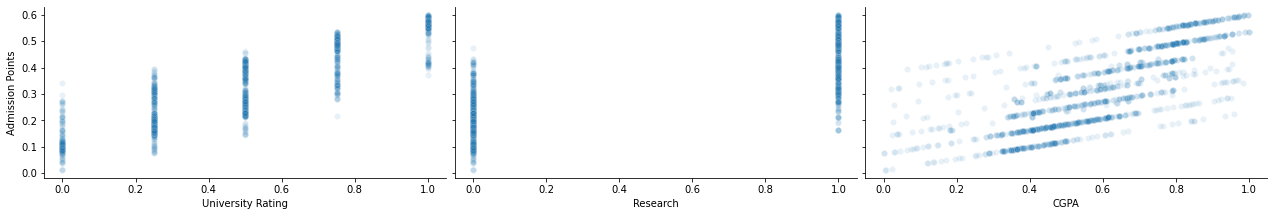

In [36]:
sns.pairplot(df_info_clean, height=3, aspect = 2, y_vars = 'Admission Points', x_vars = ['University Rating', 'Research', 'CGPA'], kind='scatter', plot_kws = {'alpha':0.1})

In [37]:
# Revisamos si CGPA tiene cierta linealidad con Admission Points 

# Creamos la variable
X = df_info_clean[['CGPA']].copy()
X['CGPA_2'] = X['CGPA']**2

# columna
col = 'CGPA_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

CGPA_2: 0.4674927732497095


Es una linealidad por encima de 0.4, comparada con las posibilidades de university rating y research, es la que mas sentido tiene por las graficas hechas con y = Admission Points, tanto research como university rating no tienen linealidad con Admission Points

### Normalidad en los Errores

Graficos de datos:

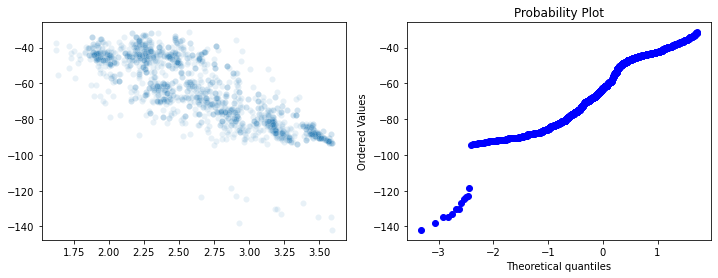

In [38]:
X = df_info.drop('Admission Points', axis = 1)
y = df_info['Admission Points']

# Calculamos los errores
errors = (p2.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = p2.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

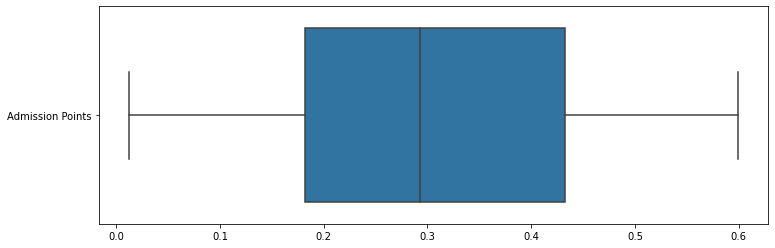

In [39]:
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_info_clean[['Admission Points']], orient="h")

### Varianza Constante (Homocedasticidad)

<AxesSubplot:xlabel='Admission Points'>

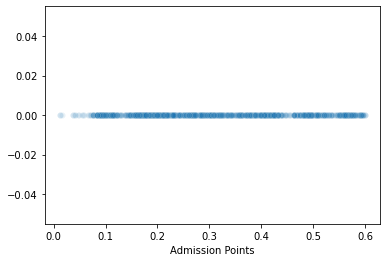

In [40]:
X = df_info_clean.drop('Admission Points', axis = 1)
y = df_info_clean['Admission Points']

# Calculamos los errores nuevamente con los datos clean
errors = (p2.predict(X) - y).values

# Visualizamos nuestros datos
sns.scatterplot(data  = df_info_clean, x = 'Admission Points', y = errors, alpha = 0.1)

## 8. Prueba del cliente

In [ ]:
import numpy as np
import pandas as pd
import joblib 

# Proceso de prubea del cliente
filename = 'modelo.joblib' # Ubicación del archivo entregado
df_recent = pd.read_csv('university_admission_test.csv') # Lectura de los datos recientes

# Lee el archivo y carga el modelo
pipeline = load(filename)

y_true = pd.read_csv('Recientes_Validacion.csv') # La columna que solo el cliente tiene
y_predicted =  pipeline.predict(df_recent)

# Calcula el desempeño del modelo
np.sqrt(mse(y_true, y_predicted))
